In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('./data/default of credit card clients.xls', skiprows=range(1))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
df_PAY = df[ [ 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] ] 

In [10]:
df_PAY.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype='object')

In [11]:
df_PAY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
PAY_0    30000 non-null int64
PAY_2    30000 non-null int64
PAY_3    30000 non-null int64
PAY_4    30000 non-null int64
PAY_5    30000 non-null int64
PAY_6    30000 non-null int64
dtypes: int64(6)
memory usage: 1.4 MB


In [12]:
df_PAY.min()

PAY_0   -2
PAY_2   -2
PAY_3   -2
PAY_4   -2
PAY_5   -2
PAY_6   -2
dtype: int64

### Binary Classification 

Customer who paid on time or before the due date has pay index 0. Now we will do binary classification.   

In [13]:
for idx in range(0,6):
    print(idx)
    df_PAY['PAY_BC_'+str(idx+1)] = df_PAY[df_PAY.columns[idx]].apply(lambda x: 1 if(x<0) else 0)

0
1
2
3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4
5


In [14]:
df_PAY.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_BC_1',
       'PAY_BC_2', 'PAY_BC_3', 'PAY_BC_4', 'PAY_BC_5', 'PAY_BC_6'],
      dtype='object')

In [15]:
df_PAY.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_BC_1,PAY_BC_2,PAY_BC_3,PAY_BC_4,PAY_BC_5,PAY_BC_6
0,2,2,-1,-1,-2,-2,0,0,1,1,1,1
1,-1,2,0,0,0,2,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,1,0,1,0,0,0


Now we want do further binary classification to find out customers who never missed a payments.

In [16]:
creditable_customer = []
j = 6
while j < 12 :
    #print(df_PAY.iloc[:,j].value_counts()[1]*100/df_PAY.iloc[:,j].value_counts()[0])
    percentile = df_PAY.iloc[:,j].value_counts()[1]*100/df_PAY.iloc[:,j].value_counts()[0]
    creditable_customer.append(percentile)
    j += 1
    
print(np.round(creditable_customer, 2))

[39.18 48.75 50.17 50.26 50.64 54.92]


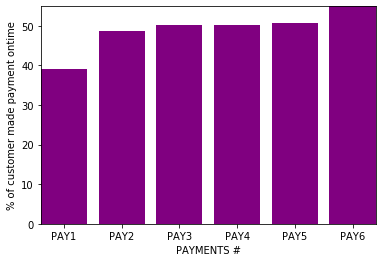

In [24]:
plt.bar(np.arange(1, len(creditable_customer)+1, 1), creditable_customer, color='purple') 
plt.autoscale(enable=True, tight=True)
plt.xlabel('PAYMENTS #')
plt.xticks([1,2,3,4,5,6],('PAY1','PAY2','PAY3','PAY4','PAY5','PAY6'))
plt.ylabel('% of customer made payment ontime')
plt.show()

Now we would find the group of customer never missed a payment

As we see there is an increasing trend of number of customer who made timely payments. 

In [142]:
def binary_classification(df_PAY, instance) :
    for idx in range(6,12):
        if df_PAY.iloc[instance, idx] == 0 :
            return 0
    return 1 

In [143]:
num = 0
for k in range(0,30000):
    if(binary_classification(df_PAY, k)==1):
        num += 1 
print(np.round(num*100/30000, 2))

17.32


##### So, only 17.32% of the customer never missed a payment.

Now we want to analyze customers in terms of their payment records 

In [144]:
idx_super = []
k = 0
while k < 30000 :
    if(binary_classification(df_PAY, k) != 0):
        idx_super.append(k)
    k += 1 

print('\n', idx_super[0:12])
print('\n Ratio : ', np.round(len(idx_super)*100/30000, 2))


 [9, 21, 23, 28, 30, 33, 34, 35, 45, 48, 52, 55]

 Ratio :  17.32


In [145]:
df_creditable = pd.DataFrame({'0':[0]})
df_creditable = df.iloc[idx_super, :]
df_creditable.iloc[:,1:12].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5195 entries, 9 to 29989
Data columns (total 11 columns):
LIMIT_BAL    5195 non-null int64
SEX          5195 non-null int64
EDUCATION    5195 non-null int64
MARRIAGE     5195 non-null int64
AGE          5195 non-null int64
PAY_0        5195 non-null int64
PAY_2        5195 non-null int64
PAY_3        5195 non-null int64
PAY_4        5195 non-null int64
PAY_5        5195 non-null int64
PAY_6        5195 non-null int64
dtypes: int64(11)
memory usage: 487.0 KB


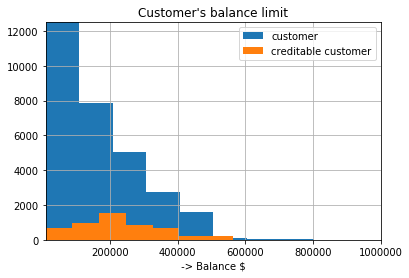

In [146]:
df['LIMIT_BAL'].hist(bins=10)
df_creditable['LIMIT_BAL'].hist(bins=10)
plt.legend(['customer', 'creditable customer'])
plt.xlabel(' -> Balance $ ')
plt.title("Customer's balance limit")
plt.autoscale(enable=True, tight=True)
plt.show()

In [147]:
largest_customer_gr = (df['LIMIT_BAL'].max() - df['LIMIT_BAL'].min())/10
print('\n The largest group of customer has a balance limit : ', '$',np.round(df['LIMIT_BAL'].min()), '  -  ', '$',np.round(largest_customer_gr))

largest_customer_gr_creditable = (df_creditable['LIMIT_BAL'].max() - df_creditable['LIMIT_BAL'].min())/10
print('\n The largest group of creditable customer has a balance limit : $', 2*np.round(largest_customer_gr_creditable), ' -  $', 3*np.round(largest_customer_gr_creditable))




 The largest group of customer has a balance limit :  $ 10000   -   $ 99000.0

 The largest group of creditable customer has a balance limit : $ 158000.0  -  $ 237000.0


##### Education : 1 -> gard school,   2 -> uni,   3 -> high school,   5 -> others 

In [175]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [176]:
df_creditable['EDUCATION'].value_counts()

1    2657
2    1789
3     661
5      36
4      35
6      13
0       4
Name: EDUCATION, dtype: int64

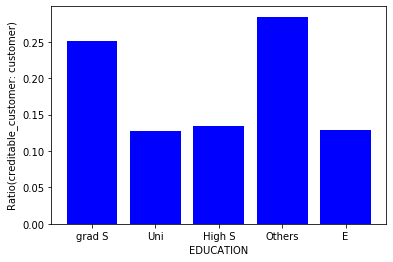

In [215]:
percent_creditable = []
jj = 1
while jj <= 5 :
    #print(df_creditable['EDUCATION'].value_counts()[jj]*100/df['EDUCATION'].value_counts()[jj])
    percent = df_creditable['EDUCATION'].value_counts()[jj]/df['EDUCATION'].value_counts()[jj]
    percent_creditable.append(percent)
    jj += 1
    
plt.bar(np.arange(1, len(percent_creditable)+1,1), percent_creditable, color='b')
plt.xlabel('EDUCATION')
plt.ylabel('Ratio(creditable_customer: customer)')
plt.xticks([1, 2, 3, 4, 5], ('grad S', 'Uni', 'High S', 'Others', 'E'))
plt.show()

In [224]:
# len(df_creditable['EDUCATION'])
np.round(df_creditable['EDUCATION'].value_counts()[4]*100/len(df_creditable['EDUCATION']), 2)

0.67

Binary classification also shows that customers with graduate degree are more creditable than undergrad customers. Though customer with technical education are also good customers, but they are a very small group, only ~0.67%

#### Age Group:

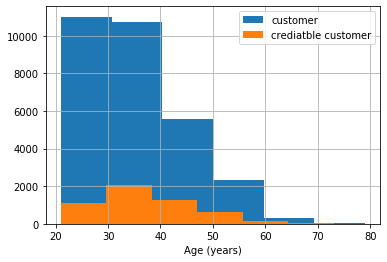

In [228]:
df['AGE'].hist(bins=6)
df_creditable['AGE'].hist(bins=6)
plt.legend(['customer', 'crediatble customer'])
plt.xlabel('Age (years)')
plt.show()

As we see, in terms of age group, ~ '20-40' are the largest group of customers; however '29-38' age group customers are most creditable.